# Post Harvesting Loss Analysis

## Installing required libraries

In [17]:
pip install numpy pandas seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [98]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [109]:
df = pd.read_csv("../data/post_harvest.csv")
df.head()

,Unnamed: 0,m49_code,cpc_code,commodity,year,loss_percentage,loss_percentage_original,loss_quantity,activity,food_supply_stage,treatment,cause_of_loss,sample_size,method_data_collection,reference,url,notes
0,0,104,23161.02,"Rice, milled",2015,1.78,1.78%,26.12kgs,Storage,Storage,"30 days storage, with trapping",Rodents,NaN,Controlled Experiment,"Dr Steven Belmain (2015), context post-harvest...",NaN,Reference has been generated automatically
1,1,104,23161.02,"Rice, milled",2015,11.77,11.77%,88.18kgs,Storage,Storage,"60 days storage, no trapping",Rodents,NaN,Controlled Experiment,"Dr Steven Belmain (2015), context post-harvest...",NaN,Reference has been generated automatically
2,2,104,23161.02,"Rice, milled",2015,5.88,5.88%,44.09kgs,Storage,Storage,"30 days storage, no trapping",Rodents,NaN,Controlled Experiment,"Dr Steven Belmain (2015), context post-harvest...",NaN,Reference has been generated automatically
3,3,104,23161.02,"Rice, milled",2015,3.57,3.57%,52.24kgs,Storage,Storage,"60 days storage, with trapping",Rodents,NaN,Controlled Experiment,"Dr Steven Belmain (2015), context post-harvest...",NaN,Reference has been generated automatically
4,4,104,23161.02,"Rice, milled",2015,17.65,17.65%,132.27kgs,Storage,Storage,"90 days storage, no trapping",Rodents,NaN,Controlled Experiment,"Dr Steven Belmain (2015), context post-harvest...",NaN,Reference has been generated automatically


## Describing the Dataset

In [110]:
df.describe()

,Unnamed: 0,m49_code,cpc_code,year,loss_percentage
count,10396.00000,10396.000000,10396.000000,10396.000000,10396.000000
mean,11843.07349,447.253944,208.316072,2010.659869,2.989790
std,7231.77974,259.620858,1012.976838,6.112047,3.803872
min,0.00000,11.000000,111.000000,2000.000000,0.004021
25%,5274.75000,231.000000,113.000000,2006.000000,1.250000
50%,11891.50000,454.000000,113.000000,2011.000000,2.500000
75%,17439.75000,686.000000,118.000000,2016.000000,3.500000
max,25415.00000,894.000000,23161.020000,2022.000000,61.100000


# Exploratory Data Analysis

### Checking for Null/Nan values in dataset

In [111]:
df.isnull().sum()

Unnamed: 0                      0
m49_code                        0
cpc_code                        0
commodity                       0
year                            0
loss_percentage                 0
loss_percentage_original        0
loss_quantity               10282
activity                      369
food_supply_stage            1615
treatment                    9965
cause_of_loss               10189
sample_size                 10023
method_data_collection        168
reference                    9099
url                           860
notes                        9847
dtype: int64

#### We can clearly see that there are multiple columns with null values in dataset. Hence, they are irrelevant to us.

In [112]:
df["method_data_collection"].unique()

array(['Controlled Experiment', 'Modelled Estimates', 'Literature Review',
       nan, 'Survey', 'Expert Opinion', 'No Data Collection Specified',
       'Case Study', 'National Accounts', 'FLW Protocol'], dtype=object)

### Dropping unnecessary columns from the dataframe

In [113]:
df1 = df.drop(df.columns[[0, 1, 2, 7, 8, 10, 11, 12, 14, 15, 16]], axis=1)
df1

,commodity,year,loss_percentage,loss_percentage_original,food_supply_stage,method_data_collection
0,"Rice, milled",2015,1.78000,1.78%,Storage,Controlled Experiment
1,"Rice, milled",2015,11.77000,11.77%,Storage,Controlled Experiment
2,"Rice, milled",2015,5.88000,5.88%,Storage,Controlled Experiment
3,"Rice, milled",2015,3.57000,3.57%,Storage,Controlled Experiment
4,"Rice, milled",2015,17.65000,17.65%,Storage,Controlled Experiment
...,...,...,...,...,...,...
10391,Millet,2000,2.50000,2.5,Farm,Modelled Estimates
10392,Millet,2000,2.50000,2.5,Farm,Modelled Estimates
10393,Millet,2000,2.38075,2.38075,Storage,Modelled Estimates
10394,Millet,2000,3.44008,3.44008,Harvest,Modelled Estimates


### Again checking for null values if any

In [114]:
df1.isnull().sum()

commodity                      0
year                           0
loss_percentage                0
loss_percentage_original       0
food_supply_stage           1615
method_data_collection       168
dtype: int64

#### As we can see still 2 columns have few null values and those columns are important for us. So, we'll fill those null values with Maximum occuring values

In [116]:
# filling missing values in 'food_supply_stage' column from maximum occuring value
df1.fillna({'food_supply_stage': df1['food_supply_stage'].mode()[0]}, inplace=True)

# filling missing values in 'method_data_collection' column from maximum occuring value
df1.fillna({'method_data_collection': df1['method_data_collection'].mode()[0]}, inplace=True)

df1.isnull().sum()

commodity                   0
year                        0
loss_percentage             0
loss_percentage_original    0
food_supply_stage           0
method_data_collection      0
dtype: int64

In [117]:
df1["food_supply_stage"].unique()

array(['Storage', 'Harvest', 'Farm', 'Processing', 'Post-harvest',
       'Retail', 'Wholesale', 'Trader', 'Whole supply chain', 'Transport',
       'Distribution', 'Food Services', 'Households', 'Market', 'Export',
       'Packing', 'Pre-harvest', 'Grading', 'Collector'], dtype=object)

In [118]:
df1["commodity"].value_counts()

commodity
Rice                   4390
Millet                 3649
Wheat                  1895
Tomatoes                317
Sunflower seed           41
Mustard seed             37
Sugar cane               30
Rice, milled             19
Other pulses n.e.c.      15
Lentils, dry              3
Name: count, dtype: int64

In [119]:
df1["commodity"].unique()

array(['Rice, milled', 'Wheat', 'Rice', 'Millet', 'Tomatoes',
       'Lentils, dry', 'Other pulses n.e.c.', 'Mustard seed',
       'Sunflower seed', 'Sugar cane'], dtype=object)

### The Seaborn Pairplot allows us to plot pairwise relationships between variables within a dataset. This creates a nice visualisation and helps us understand the data by summarising a large amount of data in a single figure. This is essential when we are exploring our dataset and trying to become familiar with it.

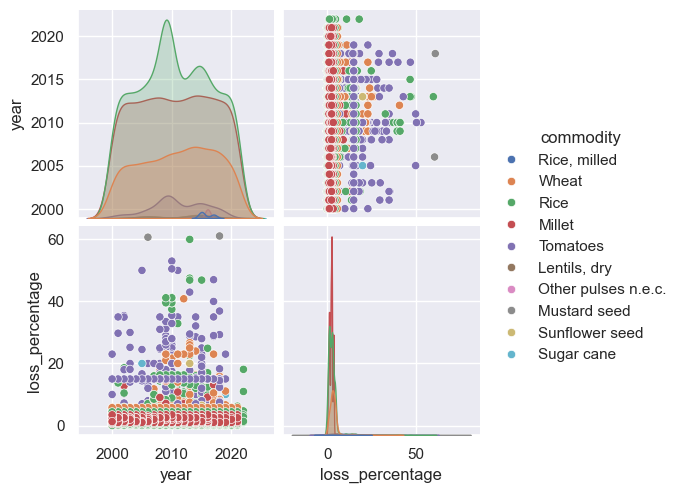

In [120]:
sns.pairplot(df1, hue="commodity")

### We can see from the below Line graph that Loss Percentage in Crops had significantly increased since 2020

<Axes: xlabel='year', ylabel='loss_percentage'>

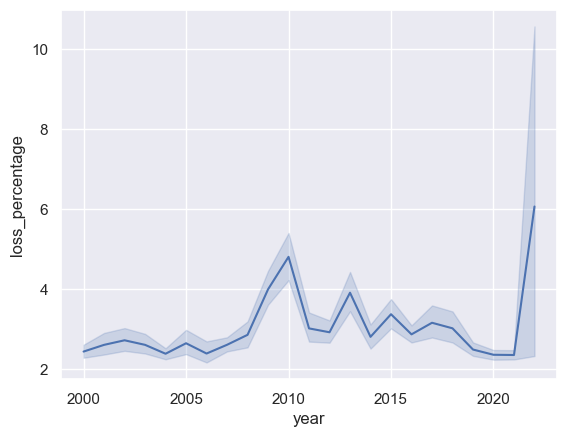

In [121]:
sns.lineplot(data=df1, x="year", y="loss_percentage")

### Most of the loss occurs due to Farm, Harvest, Storage and Transportation, as is evident from below statistics

In [122]:
df1["food_supply_stage"].value_counts()

food_supply_stage
Farm                  6285
Harvest               1773
Storage               1069
Transport              823
Whole supply chain     147
Processing              69
Retail                  68
Wholesale               63
Post-harvest            40
Households              17
Market                  10
Trader                   9
Food Services            9
Distribution             4
Packing                  3
Export                   2
Pre-harvest              2
Grading                  2
Collector                1
Name: count, dtype: int64

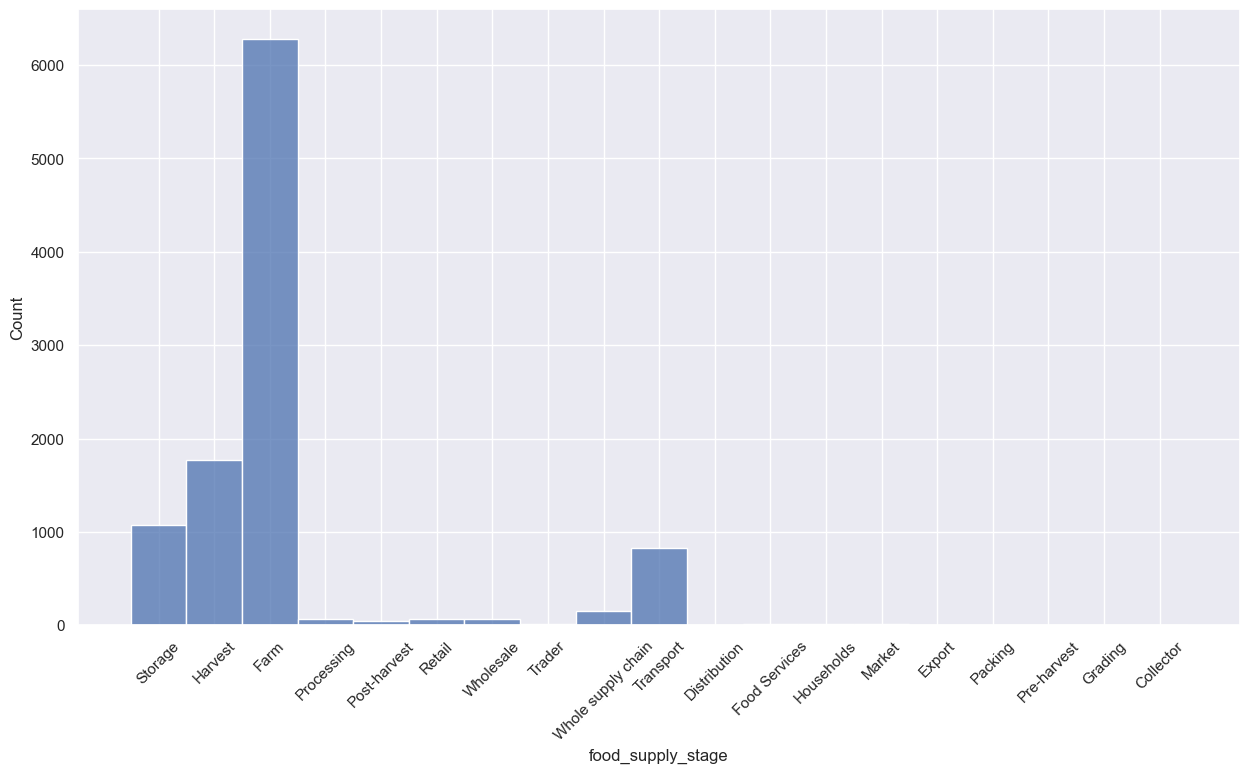

In [123]:
plt.figure(figsize=(15,8))
g = sns.histplot(data=df1, x="food_supply_stage", discrete=True)
g.set_xticklabels(labels=df1["food_supply_stage"].unique(), rotation=45)
plt.show()

### Despite being higher in count Farm, Storage and Harvest contribute less to Post Harvesting loss. Factors like Processing, Trading, Distribution and Food Services have much higher Loss percentages as shown below.

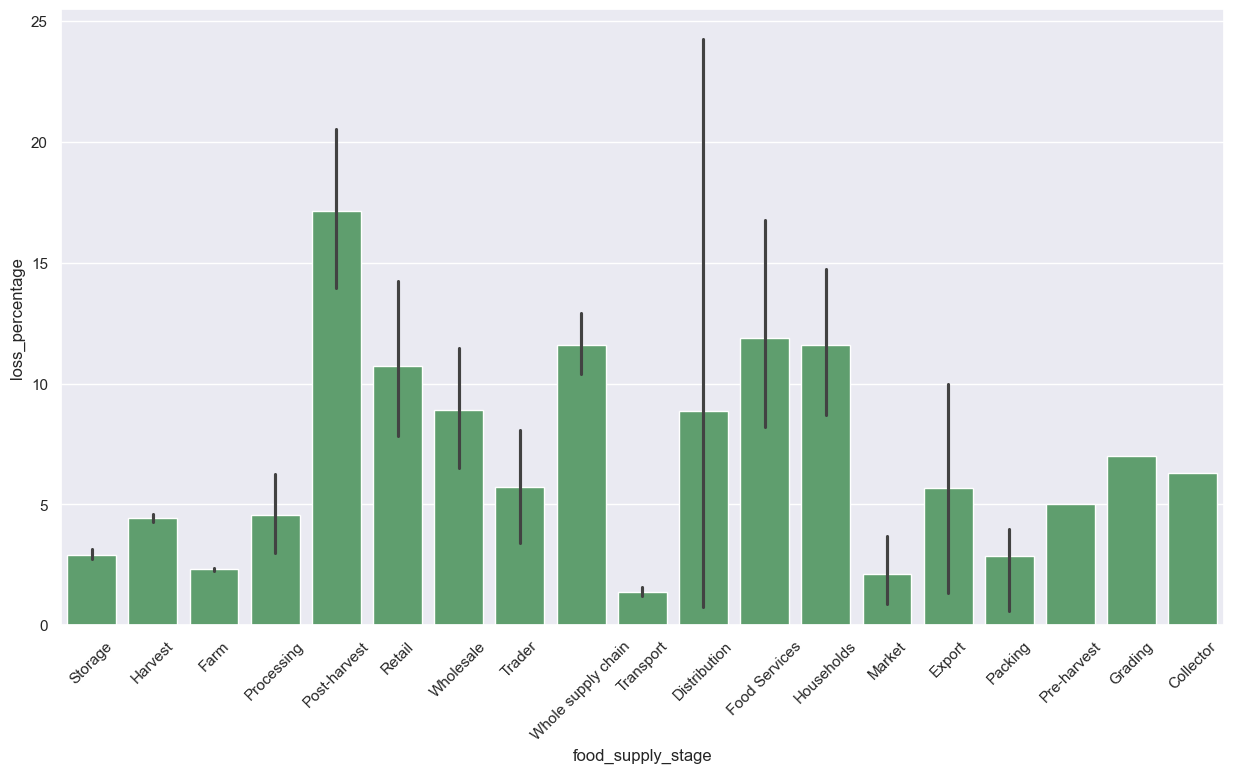

In [124]:
plt.figure(figsize=(15,8))
g = sns.barplot(data=df1, x="food_supply_stage", y="loss_percentage", color='g')
g.set_xticklabels(labels=df1["food_supply_stage"].unique(), rotation=45)
plt.show()

### It is evident from the below statistics that Tomatoes, Dry Lentils, Mustard Seeds and Milled Rice suffer the most from Post-harvest loss.

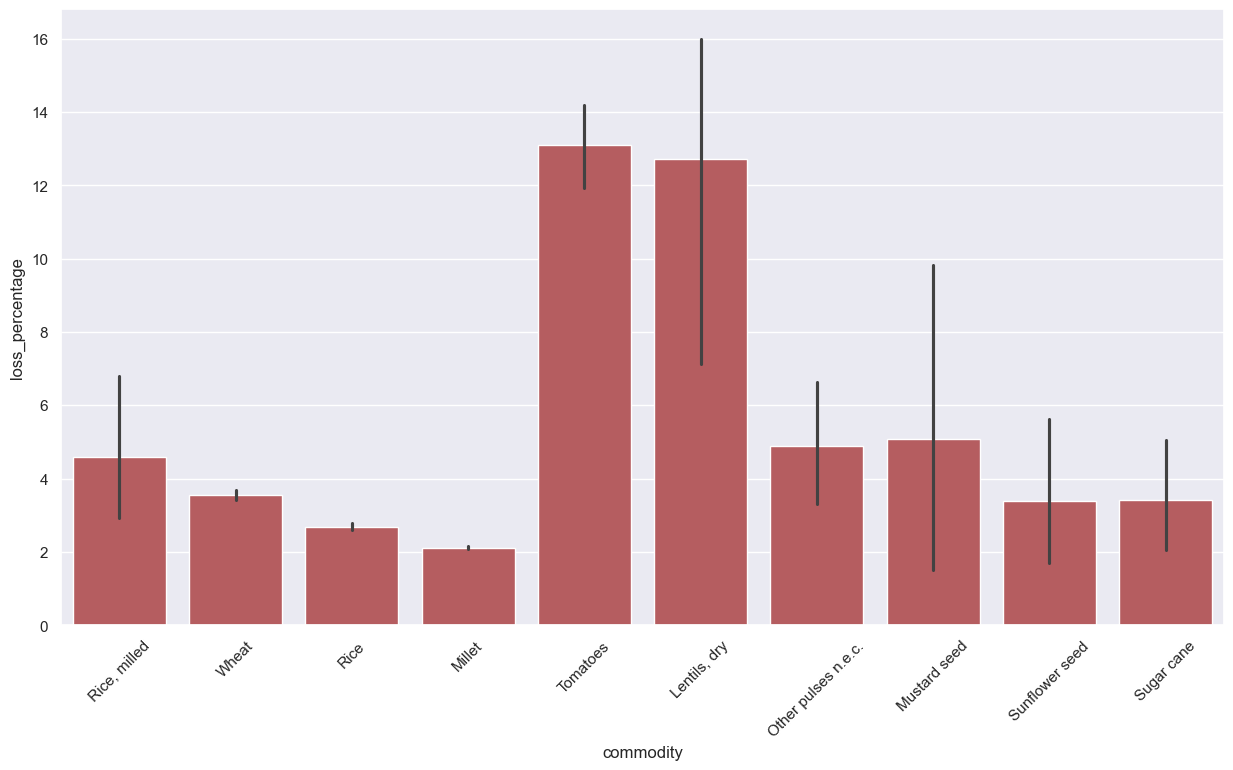

In [125]:
plt.figure(figsize=(15,8))
g = sns.barplot(data=df1, x="commodity", y="loss_percentage", color='r')
g.set_xticklabels(labels=df1["commodity"].unique(), rotation=45)
plt.show()

# Loss Reason Prediction Model

#### Converting categorical data to numerical by one-hot encoding technique

In [126]:
df_new = df1[['commodity', 'loss_percentage', 'food_supply_stage']]
encoded_df = pd.get_dummies(df_new, columns=['commodity'], dtype='int64') 
encoded_df

,loss_percentage,food_supply_stage,"commodity_Lentils, dry",commodity_Millet,commodity_Mustard seed,commodity_Other pulses n.e.c.,commodity_Rice,"commodity_Rice, milled",commodity_Sugar cane,commodity_Sunflower seed,commodity_Tomatoes,commodity_Wheat
0,1.78000,Storage,0,0,0,0,0,1,0,0,0,0
1,11.77000,Storage,0,0,0,0,0,1,0,0,0,0
2,5.88000,Storage,0,0,0,0,0,1,0,0,0,0
3,3.57000,Storage,0,0,0,0,0,1,0,0,0,0
4,17.65000,Storage,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10391,2.50000,Farm,0,1,0,0,0,0,0,0,0,0
10392,2.50000,Farm,0,1,0,0,0,0,0,0,0,0
10393,2.38075,Storage,0,1,0,0,0,0,0,0,0,0
10394,3.44008,Harvest,0,1,0,0,0,0,0,0,0,0


In [127]:
encoded_df.columns

Index(['loss_percentage', 'food_supply_stage', 'commodity_Lentils, dry',
       'commodity_Millet', 'commodity_Mustard seed',
       'commodity_Other pulses n.e.c.', 'commodity_Rice',
       'commodity_Rice, milled', 'commodity_Sugar cane',
       'commodity_Sunflower seed', 'commodity_Tomatoes', 'commodity_Wheat'],
      dtype='object')

#### Seperating data into independent variables (X) and target variable (Y) for model.

In [128]:
c=encoded_df['food_supply_stage'].astype('category')
targets = dict(enumerate(c.cat.categories))
print(targets)
encoded_df['target']=c.cat.codes
print(encoded_df.target.unique())
y=encoded_df.target
X=encoded_df[['loss_percentage', 'commodity_Lentils, dry',
       'commodity_Millet', 'commodity_Mustard seed',
       'commodity_Other pulses n.e.c.', 'commodity_Rice',
       'commodity_Rice, milled', 'commodity_Sugar cane',
       'commodity_Sunflower seed', 'commodity_Tomatoes', 'commodity_Wheat']]

{0: 'Collector', 1: 'Distribution', 2: 'Export', 3: 'Farm', 4: 'Food Services', 5: 'Grading', 6: 'Harvest', 7: 'Households', 8: 'Market', 9: 'Packing', 10: 'Post-harvest', 11: 'Pre-harvest', 12: 'Processing', 13: 'Retail', 14: 'Storage', 15: 'Trader', 16: 'Transport', 17: 'Whole supply chain', 18: 'Wholesale'}
[14  6  3 12 10 13 18 15 17 16  1  4  7  8  2  9 11  5  0]


**Correlation visualization between features. We can see how loss percentage and tomatoes are highly correlated.**

<Axes: >

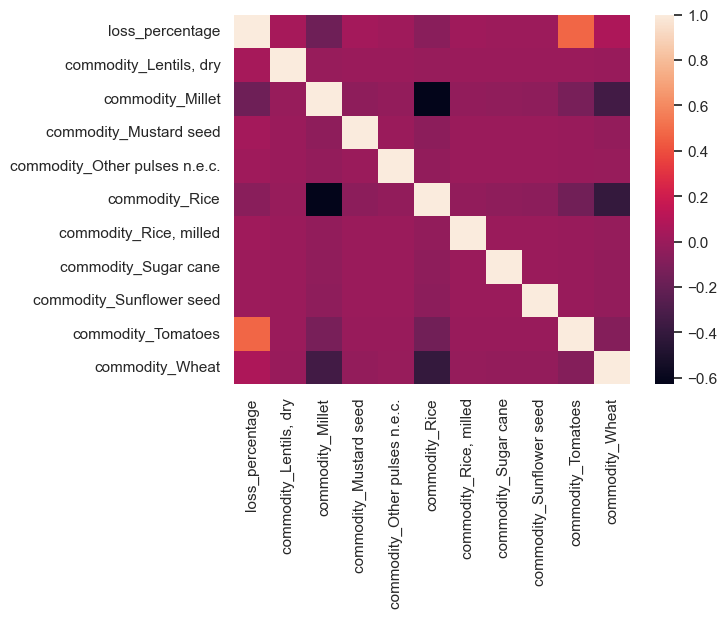

In [129]:
sns.heatmap(X.corr())

# FEATURE SCALING
**Feature scaling is required before creating training data and feeding it to the model.**

In [130]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

# we must apply the scaling to the test set as well that we are computing for the training set
X_test_scaled = scaler.transform(X_test)

# MODEL SELECTION

## Decision Tree Classifier for Loss Stage (Reason) prediction.
<hr>

In [131]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train_scaled, y_train)

print("Accuracy : ", round(dtc.score(X_test_scaled, y_test)*100, 2), "%")

Accuracy :  91.07 %


### Let's visualize the import features which are taken into consideration by decision trees.

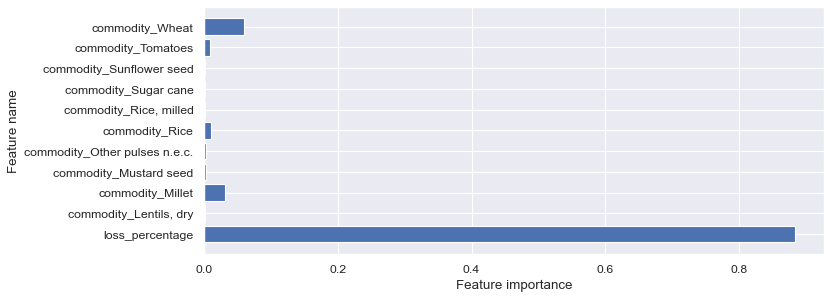

In [132]:
plt.figure(figsize=(10,4), dpi=80)
c_features = len(X_train.columns)
plt.barh(range(c_features), dtc.feature_importances_)
plt.xlabel("Feature importance")
plt.ylabel("Feature name")
plt.yticks(np.arange(c_features), X_train.columns)
plt.show()

### Confusion Matrix

<Axes: >

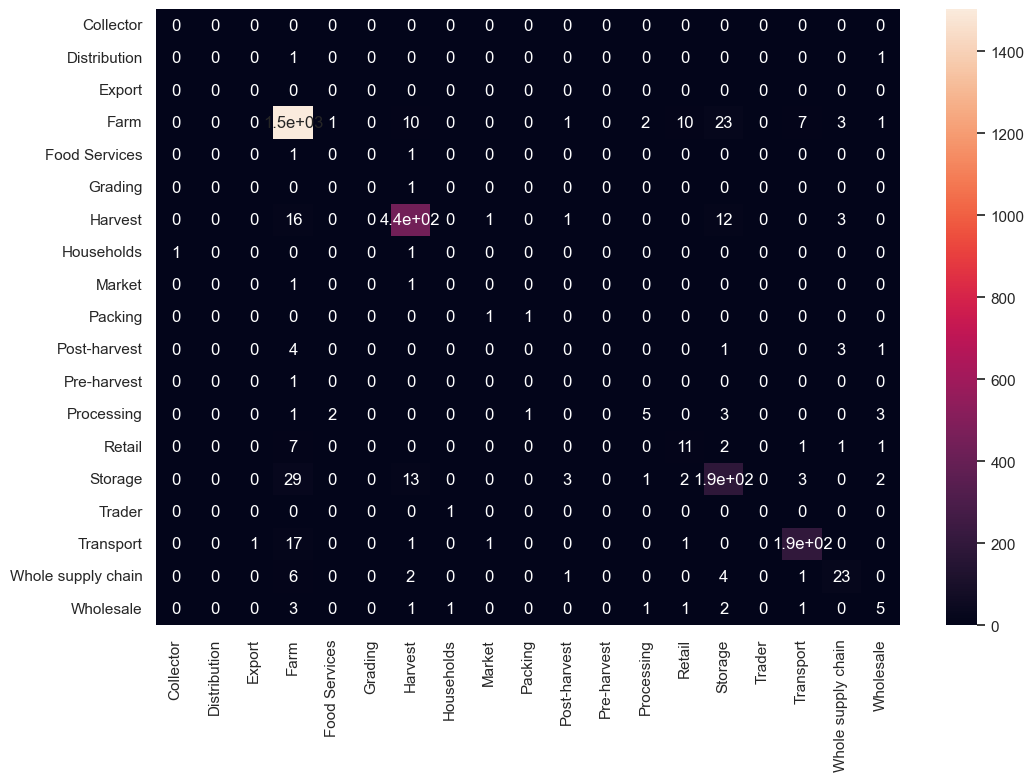

In [133]:
from sklearn.metrics import confusion_matrix

mat=confusion_matrix(y_test, dtc.predict(X_test_scaled))
df_cm = pd.DataFrame(mat, list(targets.values()), list(targets.values()))
sns.set(font_scale=1.0) # for label size
plt.figure(figsize = (12,8))
sns.heatmap(df_cm, annot=True, annot_kws={"size": 12})

## Conclusion

We can see that our Decision Tree Classifier model predicts Loss Stage with 91.04% accuracy on test data, which is a good amount of evaluation.

# Loss Stage(Loss Reason) Prediction based on User Input for loss and type of crop

In [134]:
# Predicting Loss Stage based on certain values entered by user
mapper = dict({1: 'commodity_Lentils, dry', 2:'commodity_Millet', 3:'commodity_Mustard seed', 4:'commodity_Other pulses n.e.c.', 5:'commodity_Rice', 6:'commodity_Rice, milled', 7:'commodity_Sugar cane', 8:'commodity_Sunflower seed', 9:'commodity_Tomatoes', 10:'commodity_Wheat'})
# print(mapper)
loss = eval(input("Enter Loss Percentage : "))
crop = int(input('Enter crop number (1 or 2 etc.) from below menu for which you want to predict loss : \n 1. Dry Lentils \n 2. Millet \n 3.Mustard Seed \n 4. Other Pulses \n 5. Rice \n 6. Milled Rice \n 7. Sugarcane \n 8. Sunflower seed \n 9. Tomatoes \n 10. Wheat \n '))

def helper(col, key):
    val = mapper[key]
    if(val == col):
        return 1
    else:
        return 0

d = dict({'loss_percentage':[loss], 'commodity_Lentils, dry': [helper('commodity_Lentils, dry', crop)], 'commodity_Millet':[helper('commodity_Millet', crop)], 'commodity_Mustard seed':[helper('commodity_Mustard seed', crop)], 'commodity_Other pulses n.e.c.':[helper('commodity_Other pulses n.e.c.', crop)], 'commodity_Rice':[helper('commodity_Rice', crop)], 'commodity_Rice, milled':[helper('commodity_Rice, milled', crop)], 'commodity_Sugar cane':[helper('commodity_Sugar cane', crop)], 'commodity_Sunflower seed':[helper('commodity_Sunflower seed', crop)], 'commodity_Tomatoes':[helper('commodity_Tomatoes', crop)], 'commodity_Wheat':[helper('commodity_Wheat', crop)]})

new_data = pd.DataFrame(d)
print("\n-----------------------------------------------------------------------\n")
print(d)
print("\n-----------------------------------------------------------------------\n")
# Make predictions for the new data
predicted_label = dtc.predict(new_data)

print("Predicted Loss Stage (Loss Reason) : ", targets[predicted_label[0]])

Enter Loss Percentage :  2.2
Enter crop number (1 or 2 etc.) from below menu for which you want to predict loss : 
 1. Dry Lentils 
 2. Millet 
 3.Mustard Seed 
 4. Other Pulses 
 5. Rice 
 6. Milled Rice 
 7. Sugarcane 
 8. Sunflower seed 
 9. Tomatoes 
 10. Wheat 
  9



-----------------------------------------------------------------------

{'loss_percentage': [2.2], 'commodity_Lentils, dry': [0], 'commodity_Millet': [0], 'commodity_Mustard seed': [0], 'commodity_Other pulses n.e.c.': [0], 'commodity_Rice': [0], 'commodity_Rice, milled': [0], 'commodity_Sugar cane': [0], 'commodity_Sunflower seed': [0], 'commodity_Tomatoes': [1], 'commodity_Wheat': [0]}

-----------------------------------------------------------------------

Predicted Loss Stage (Loss Reason) :  Farm
